***Dr. Emmanuel Dufourq*** www.emmanueldufourq.com

***African Institute for Mathematical Sciences***

***2019***


Credits: The data imports were extracted from https://keras.rstudio.com/articles/examples/mnist_cnn.html

***NOTE***

Be sure to use hardware acceleration to use the GPU. Click on `Runtime`, change `runtime type`, and select `GPU` for the *hardware accelerator* option.

In [24]:
devtools::install_github("rstudio/keras")

Skipping install of 'keras' from a github remote, the SHA1 (34dc89ed) has not changed since last install.
  Use `force = TRUE` to force installation


## Import the Keras library

In [0]:
library(keras)

## Load the CIFAR10 dataset

In [0]:
cifar10 <- dataset_cifar10()

In [27]:
dim(cifar10$train$x)

[1] 50000    32    32     3

In [28]:
dim(cifar10$test$x)

[1] 10000    32    32     3

## Load features

In [0]:
x_train <- cifar10$train$x
x_test <- cifar10$test$x

## Load targets

In [0]:
y_train <- cifar10$train$y
y_test <- cifar10$test$y

In [0]:
rm(cifar10)

## Check dimension

Notice here that there are three channels in each image, one for the red, green and blue channels.

In [32]:
dim(x_train)

[1] 50000    32    32     3

In [0]:
x_train <- array_reshape(x_train, c(nrow(x_train), 32, 32, 3))
x_test <- array_reshape(x_test, c(nrow(x_test), 32, 32, 3))

## Take a look at a  training example

The dimension is correct but take a look at the values in the data point. The values are large, between 0 and 255. Thus we will need to normalise the values.

In [34]:
dim(x_train[1,,,])

[1] 32 32  3

In [35]:
print(x_train[1,,,1])

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]   59   43   50   68   98  119  139  145  149   149   131   125   142
 [2,]   16    0   18   51   88  120  128  127  126   116   106   101   105
 [3,]   25   16   49   83  110  129  130  121  113   112   112   106   105
 [4,]   33   38   87  106  115  117  114  105  107   121   125   109   113
 [5,]   50   59  102  127  124  121  120  114  107   125   129   106   108
 [6,]   71   84  110  129  136  131  129  119  108   122   123   105   107
 [7,]   97  111  123  130  136  132  122  121  127   138   124   120   107
 [8,]  115  119  130  140  133  127  138  137  131   133   134   108    72
 [9,]  137  128  132  128  119  123  128  130  121   137   131    74    54
[10,]  154  154  156  140  123  125  126  127  133   132    90    63    62
[11,]  154  155  156  147  133  137  139  134  141   121    80    97    90
[12,]  145  146  146  135  127  129  117  103  130   120   111   146   136
[13,]  142  141  140  144

## Normalise

In [0]:
x_train <- x_train / 255
x_test <- x_test / 255

Now we can check the values. This looks better and is suitable for a CNN.

In [37]:
print(x_train[1,,,1])

            [,1]      [,2]       [,3]      [,4]      [,5]      [,6]      [,7]
 [1,] 0.23137255 0.1686275 0.19607843 0.2666667 0.3843137 0.4666667 0.5450980
 [2,] 0.06274510 0.0000000 0.07058824 0.2000000 0.3450980 0.4705882 0.5019608
 [3,] 0.09803922 0.0627451 0.19215686 0.3254902 0.4313725 0.5058824 0.5098039
 [4,] 0.12941176 0.1490196 0.34117647 0.4156863 0.4509804 0.4588235 0.4470588
 [5,] 0.19607843 0.2313725 0.40000000 0.4980392 0.4862745 0.4745098 0.4705882
 [6,] 0.27843137 0.3294118 0.43137255 0.5058824 0.5333333 0.5137255 0.5058824
 [7,] 0.38039216 0.4352941 0.48235294 0.5098039 0.5333333 0.5176471 0.4784314
 [8,] 0.45098039 0.4666667 0.50980392 0.5490196 0.5215686 0.4980392 0.5411765
 [9,] 0.53725490 0.5019608 0.51764706 0.5019608 0.4666667 0.4823529 0.5019608
[10,] 0.60392157 0.6039216 0.61176471 0.5490196 0.4823529 0.4901961 0.4941176
[11,] 0.60392157 0.6078431 0.61176471 0.5764706 0.5215686 0.5372549 0.5450980
[12,] 0.56862745 0.5725490 0.57254902 0.5294118 0.4980392 0.5058

## Convert targets/labels to their one-hot encoded equivalent

In [0]:
y_train <- to_categorical(y_train, 10)
y_test <- to_categorical(y_test, 10)

## Create a model

We specify an input shape of `c(28, 28, 3)`. Note here we specify three channels

The architecture is as follows: two convolutional layers, followed by max pooling and dropout, then a fully connected layer with dropout and finally the output fully connected layer. The last layer has 10 units (one for each digit 0 to 9). Note that between the max pooling layer and the first fully connected layer is the flattening operation `layer_flatten()`. This is how we go from convolutional based layers to fully connected ones.

In [0]:
model <- keras_model_sequential() %>%
  layer_conv_2d(filters = 32, kernel_size = c(3,3), activation = 'relu',input_shape = c(32,32,3)) %>% 
  layer_conv_2d(filters = 32, kernel_size = c(3,3), activation = 'relu') %>% 
  layer_max_pooling_2d(pool_size = c(2, 2)) %>% 
  layer_dropout(rate = 0.25) %>% 
  layer_conv_2d(filters = 32, kernel_size = c(3,3), activation = 'relu') %>% 
  layer_max_pooling_2d(pool_size = c(2, 2)) %>% 
  layer_flatten() %>%  # We use the flatten function to go from the CNN structure to the MLP
  layer_dense(units = 128, activation = 'relu') %>% # the MLP starts here
  layer_dropout(rate = 0.5) %>% 
  layer_dense(units = 10, activation = 'softmax')

## Compile the model

In [0]:
model %>% compile(
  loss = loss_categorical_crossentropy,
  optimizer = optimizer_adadelta(),
  metrics = c('accuracy')
)

## Allow printing to the screen

In [0]:
print_dot_callback <- callback_lambda(
  on_epoch_end = function(epoch, logs) {
    if (epoch %% 1 == 0) cat(epoch, '\n')
  }
)   

## Early stopping to avoid over-fitting

In [0]:
# The patience parameter is the amount of epochs to check for improvement.
early_stop <- callback_early_stopping(monitor = "val_loss", patience = 6)

## Train the model

Training on this dataset can take 3-4 minutes

In [43]:
history <- model %>% fit(
  x_train,
  y_train,
  epochs = 15,
  validation_split = 0.2,
  verbose = 0,
  batch_size = 8,
  callbacks = list(early_stop, print_dot_callback)
)

0 
1 
2 
3 
4 
5 
6 
7 
8 


### Plot the performance

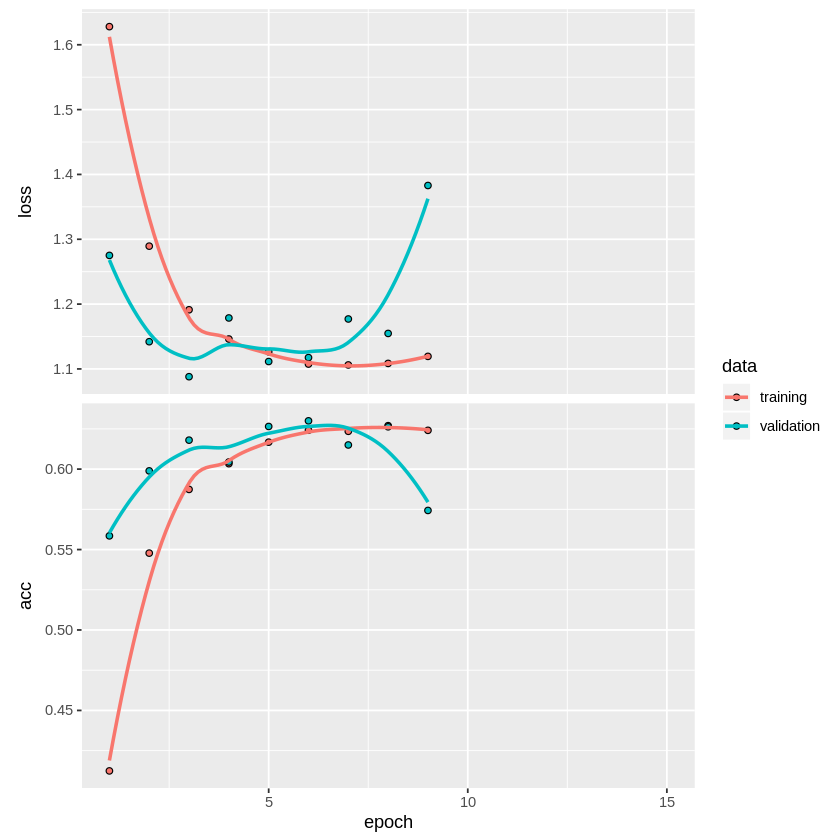

In [44]:
plot(history)

## Evaluate the performance

In [45]:
model %>% evaluate(x_test, y_test)

$loss
[1] 1.389019

$acc
[1] 0.5672